In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1594a0aedea4f58950aae37732f1c66e


In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | brae
Processing Record 6 of Set 1 | ji-parana
City not found. Skipping...
Processing Record 7 of Set 1 | santa lucia
Processing Record 8 of Set 1 | sompeta
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | hay river
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | gorontalo
Processing Record 13 of Set 1 | pacific grove
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | merritt island
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | rikitea
Processing Record

Processing Record 36 of Set 4 | gamba
Processing Record 37 of Set 4 | grootfontein
Processing Record 38 of Set 4 | chernenko
Processing Record 39 of Set 4 | poya
Processing Record 40 of Set 4 | nyazepetrovsk
Processing Record 41 of Set 4 | oruro
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | bartica
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | vaini
Processing Record 46 of Set 4 | tunxi
City not found. Skipping...
Processing Record 47 of Set 4 | tres passos
Processing Record 48 of Set 4 | passi
Processing Record 49 of Set 4 | hithadhoo
Processing Record 50 of Set 4 | koshurnikovo
Processing Record 1 of Set 5 | satitoa
City not found. Skipping...
Processing Record 2 of Set 5 | jasper
Processing Record 3 of Set 5 | kjopsvik
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | kupino
Processing Record 6 of Set 5 | tshikapa
Processing Record 7 of Set 5 | saint-philippe
Processing Record 8 o

Processing Record 25 of Set 8 | kodiak
Processing Record 26 of Set 8 | kantunilkin
Processing Record 27 of Set 8 | wanaka
Processing Record 28 of Set 8 | lavrentiya
Processing Record 29 of Set 8 | salekhard
Processing Record 30 of Set 8 | gubkinskiy
Processing Record 31 of Set 8 | devils lake
Processing Record 32 of Set 8 | qujing
Processing Record 33 of Set 8 | parsons
Processing Record 34 of Set 8 | leningradskiy
Processing Record 35 of Set 8 | lata
Processing Record 36 of Set 8 | iguai
Processing Record 37 of Set 8 | belen
Processing Record 38 of Set 8 | prescott
Processing Record 39 of Set 8 | hailar
Processing Record 40 of Set 8 | quthing
Processing Record 41 of Set 8 | teguldet
Processing Record 42 of Set 8 | fort morgan
Processing Record 43 of Set 8 | jalu
Processing Record 44 of Set 8 | lompoc
Processing Record 45 of Set 8 | margate
Processing Record 46 of Set 8 | mount gambier
Processing Record 47 of Set 8 | quartz hill
Processing Record 48 of Set 8 | banda aceh
Processing Rec

Processing Record 19 of Set 12 | serenje
Processing Record 20 of Set 12 | zhangjiakou
Processing Record 21 of Set 12 | barawe
City not found. Skipping...
Processing Record 22 of Set 12 | trogir
Processing Record 23 of Set 12 | sheltozero
Processing Record 24 of Set 12 | shumikha
Processing Record 25 of Set 12 | vega de alatorre
Processing Record 26 of Set 12 | san rafael
Processing Record 27 of Set 12 | kurilsk
Processing Record 28 of Set 12 | sire
Processing Record 29 of Set 12 | miri
Processing Record 30 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 31 of Set 12 | tiznit
Processing Record 32 of Set 12 | fare
Processing Record 33 of Set 12 | krasnoselkup
Processing Record 34 of Set 12 | challans
Processing Record 35 of Set 12 | ocampo
Processing Record 36 of Set 12 | walvis bay
Processing Record 37 of Set 12 | moose factory
Processing Record 38 of Set 12 | bathsheba
Processing Record 39 of Set 12 | erie
Processing Record 40 of Set 12 | cedar city
Processing Record

In [19]:
len(city_data)

569

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.59,26.89,61.56,80,100,19.73,ZA,2020-11-09 11:15:46
1,Castro,-24.79,-50.01,62.28,89,92,7.36,BR,2020-11-09 11:15:46
2,Brae,60.40,-1.35,51.80,93,75,12.75,GB,2020-11-09 11:15:47
3,Santa Lucia,27.91,-15.54,75.00,64,40,16.11,ES,2020-11-09 11:15:47
4,Sompeta,18.93,84.60,78.66,58,0,8.39,IN,2020-11-09 11:15:47
5,Dingle,11.00,122.67,78.03,88,87,4.43,PH,2020-11-09 11:15:48
6,Hay River,60.82,-115.80,21.20,73,54,16.11,CA,2020-11-09 11:15:48
7,Albany,42.60,-73.97,42.01,100,1,1.68,US,2020-11-09 11:15:48
8,Gorontalo,0.54,123.06,77.34,79,51,4.81,ID,2020-11-09 11:15:49
9,Pacific Grove,36.62,-121.92,44.60,65,1,8.05,US,2020-11-09 11:15:49


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2020-11-09 11:15:46,-33.59,26.89,61.56,80,100,19.73
1,Castro,BR,2020-11-09 11:15:46,-24.79,-50.01,62.28,89,92,7.36
2,Brae,GB,2020-11-09 11:15:47,60.40,-1.35,51.80,93,75,12.75
3,Santa Lucia,ES,2020-11-09 11:15:47,27.91,-15.54,75.00,64,40,16.11
4,Sompeta,IN,2020-11-09 11:15:47,18.93,84.60,78.66,58,0,8.39
5,Dingle,PH,2020-11-09 11:15:48,11.00,122.67,78.03,88,87,4.43
6,Hay River,CA,2020-11-09 11:15:48,60.82,-115.80,21.20,73,54,16.11
7,Albany,US,2020-11-09 11:15:48,42.60,-73.97,42.01,100,1,1.68
8,Gorontalo,ID,2020-11-09 11:15:49,0.54,123.06,77.34,79,51,4.81
9,Pacific Grove,US,2020-11-09 11:15:49,36.62,-121.92,44.60,65,1,8.05


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today = time.strftime("%x")
today

'11/09/20'

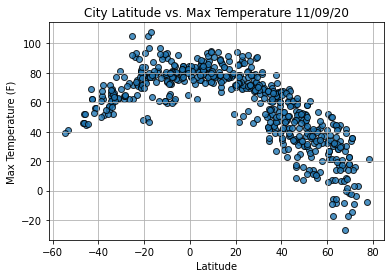

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

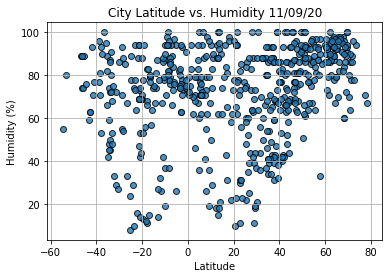

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

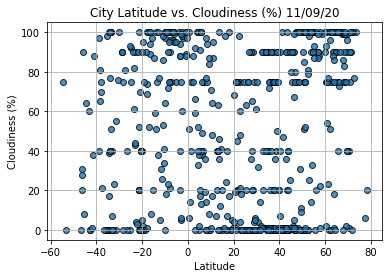

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

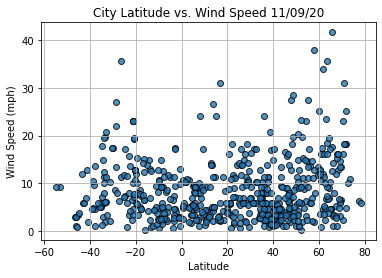

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [36]:
# Import Matplotlib.
import matplotlib.pyplot as plt

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [52]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Add a title to graph
    plt.title(title)
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Brae,GB,2020-11-09 11:15:47,60.40,-1.35,51.80,93,75,12.75
3,Santa Lucia,ES,2020-11-09 11:15:47,27.91,-15.54,75.00,64,40,16.11
4,Sompeta,IN,2020-11-09 11:15:47,18.93,84.60,78.66,58,0,8.39
5,Dingle,PH,2020-11-09 11:15:48,11.00,122.67,78.03,88,87,4.43
6,Hay River,CA,2020-11-09 11:15:48,60.82,-115.80,21.20,73,54,16.11


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

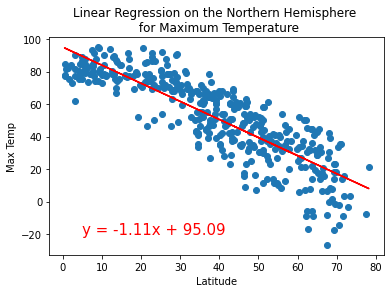

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
graph_title = 'Linear Regression on the Northern Hemisphere \n' +' for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, graph_title, 'Max Temp',(5,-20))

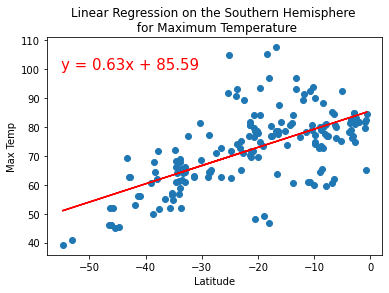

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
graph_title = 'Linear Regression on the Southern Hemisphere \n' +' for Maximum Temperature'
# Call the function.
plot_linear_regression(x_values, y_values, graph_title, 'Max Temp',(-55,100))

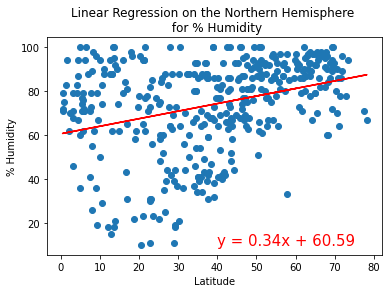

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
graph_title = 'Linear Regression on the Northern Hemisphere \n' +' for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values,graph_title, '% Humidity',(40,10))

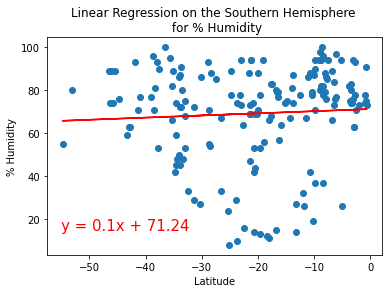

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
graph_title = 'Linear Regression on the Southern Hemisphere \n' +' for % Humidity'
# Call the function.
plot_linear_regression(x_values, y_values,graph_title, '% Humidity',(-55,15))

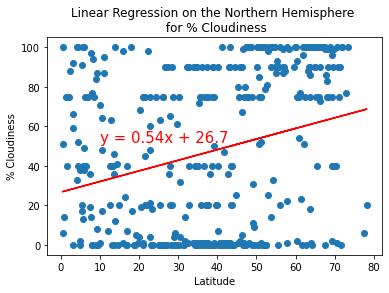

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
graph_title = 'Linear Regression on the Northern Hemisphere \n' +' for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values, graph_title, '% Cloudiness', (10,52))

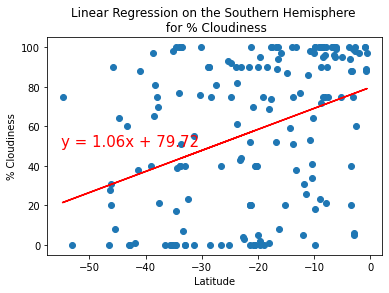

In [79]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
graph_title = 'Linear Regression on the Southern Hemisphere \n' +' for % Cloudiness'
# Call the function.
plot_linear_regression(x_values, y_values, graph_title, '% Cloudiness', (-55,50))

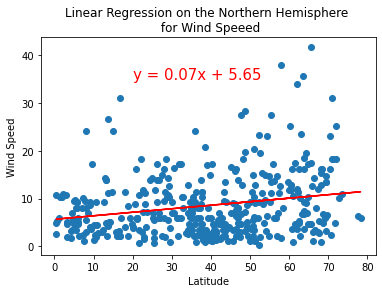

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
graph_title = 'Linear Regression on the Northern Hemisphere \n' +' for Wind Speeed'
# Call the function.
plot_linear_regression(x_values, y_values, graph_title, 'Wind Speed',(20,35))

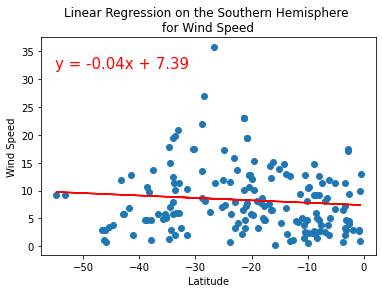

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n' + 'for Wind Speed', 'Wind Speed',(-55,32))